In [2]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read csv files for each year and store in relevant dataframe:
#yearlist=["2012","2013","2014","2015","2016"]
#for year in yearlist:
#    fname="ObesityEduIncome_" + year + ".csv"
#    print(fname)
edui2012_df = pd.read_csv("ObesityEduIncome_2012.csv")
edui2013_df = pd.read_csv("ObesityEduIncome_2013.csv")
edui2014_df = pd.read_csv("ObesityEduIncome_2014.csv")
edui2015_df = pd.read_csv("ObesityEduIncome_2015.csv")
edui2016_df = pd.read_csv("ObesityEduIncome_2016.csv")
    

In [4]:
edui2016_df.head(5)

,State,Date,BMI Category,BMI Over 25,Education_Level,INCOME2
0,AL,1072016,Normal Weight,No,Graduated High School,"$25,000 to less than $35,000"
1,AL,1112016,Overweight,Yes,Graduated High School,"$50,000 to less than $75,000"
2,AL,1062016,Normal Weight,No,Attended College or Technical School,"$50,000 to less than $75,000"
3,AL,1082016,Overweight,Yes,Graduated from College or Technical School,"$50,000 to less than $75,000"
4,AL,1052016,Normal Weight,No,Graduated High School,Don’t know/Not sure


In [5]:
#Review unqiue values for BMI category
edui2016_df["BMI Category"].unique()

array(['Normal Weight', 'Overweight', "Don't know/Refused/Missing",
       'Obese', 'Underweight'], dtype=object)

In [6]:
edui2016_df["Education_Level"].unique()

array(['Graduated High School', 'Attended College or Technical School',
       'Graduated from College or Technical School',
       'Did not graduate High School', 'Don’t know/Not sure/Missing'],
      dtype=object)

In [7]:
cnt=0
for row,col in edui2016_df.iterrows():
    print(col)
    cnt=cnt+1
    if cnt > 2:
        break

State                                        AL
Date                                    1072016
BMI Category                      Normal Weight
BMI Over 25                                  No
Education_Level           Graduated High School
INCOME2            $25,000 to less than $35,000
Name: 0, dtype: object
State                                        AL
Date                                    1112016
BMI Category                         Overweight
BMI Over 25                                 Yes
Education_Level           Graduated High School
INCOME2            $50,000 to less than $75,000
Name: 1, dtype: object
State                                                AL
Date                                            1062016
BMI Category                              Normal Weight
BMI Over 25                                          No
Education_Level    Attended College or Technical School
INCOME2                    $50,000 to less than $75,000
Name: 2, dtype: object


In [8]:
#separate values for BMI category into just overweight, obese and other. 
edui2016_df["BMI Category"] = edui2016_df["BMI Category"].replace(
    {"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})


In [9]:
edui2016_df["BMI Category"].unique()

array(['Other', 'Overweight', 'Obese'], dtype=object)

In [12]:
#group by education level and bmi category to get counts in each category.
edui2016_grp = edui2016_df.groupby(["Education_Level","BMI Category"])["State"].count()

In [14]:
#unstack to get each count as a column in the dataframe.
edui2016_grp_cnt = edui2016_grp.unstack(level=1)

In [15]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight
Education_Level,,,
Attended College or Technical School,39987,49065,43616
Did not graduate High School,12125,14086,11478
Don’t know/Not sure/Missing,220,1215,314
Graduated High School,42256,49546,43941
Graduated from College or Technical School,40230,73599,60773


In [16]:
#Determine total counts for all categories.
edui2016_grp_cnt["Total_cnt"] = edui2016_grp_cnt["Obese"] + edui2016_grp_cnt["Overweight"] + edui2016_grp_cnt["Other"] 

In [18]:
#Determine percent obese for each education level
edui2016_grp_cnt["percent_obese"] = (edui2016_grp_cnt["Obese"] / edui2016_grp_cnt["Total_cnt"]) * 100

In [20]:
#Determine percent overweight for each education level
edui2016_grp_cnt["percent_overweight"] = (edui2016_grp_cnt["Overweight"] / edui2016_grp_cnt["Total_cnt"]) * 100

In [30]:
#make Education a column in the dataframe.
edui2016_grp_cnt["Education_level"]= edui2016_grp_cnt.index

In [31]:
edui2016_grp_cnt.columns

Index(['Obese', 'Other', 'Overweight', 'Total_cnt', 'percent_obese',
       'percent_overweight', 'Education_level'],
      dtype='object', name='BMI Category')

In [35]:
edui2016_grp_cnt["Education_level"]

Education_Level
Attended College or Technical School                Attended College or Technical School
Did not graduate High School                                Did not graduate High School
Don’t know/Not sure/Missing                                  Don’t know/Not sure/Missing
Graduated High School                                              Graduated High School
Graduated from College or Technical School    Graduated from College or Technical School
Name: Education_level, dtype: object

In [38]:
#Create another column with education short form for ease of plotting.
edui2016_grp_cnt["Education_short"] = edui2016_grp_cnt["Education_level"]

In [41]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight,Education_level,Education_short
Education_Level,,,,,,,,
Attended College or Technical School,39987,49065,43616,132668,30.140652,32.876051,Attended College or Technical School,Attended College or Technical School
Did not graduate High School,12125,14086,11478,37689,32.171191,30.454509,Did not graduate High School,Did not graduate High School
Don’t know/Not sure/Missing,220,1215,314,1749,12.578616,17.953116,Don’t know/Not sure/Missing,Don’t know/Not sure/Missing
Graduated High School,42256,49546,43941,135743,31.129414,32.370730,Graduated High School,Graduated High School
Graduated from College or Technical School,40230,73599,60773,174602,23.040973,34.806589,Graduated from College or Technical School,Graduated from College or Technical School


In [42]:
#Replace education level with short form values. 
edui2016_grp_cnt["Education_short"] = edui2016_grp_cnt["Education_short"].replace(
    {"Attended College or Technical School": "ST College", "Did not graduate High School":"No-pass HS",
     "Don’t know/Not sure/Missing":"Unknown","Graduated High School":"Grad HS",
     "Graduated from College or Technical School":"Grad College"
    })

In [43]:
edui2016_grp_cnt

BMI Category,Obese,Other,Overweight,Total_cnt,percent_obese,percent_overweight,Education_level,Education_short
Education_Level,,,,,,,,
Attended College or Technical School,39987,49065,43616,132668,30.140652,32.876051,Attended College or Technical School,ST College
Did not graduate High School,12125,14086,11478,37689,32.171191,30.454509,Did not graduate High School,No-pass HS
Don’t know/Not sure/Missing,220,1215,314,1749,12.578616,17.953116,Don’t know/Not sure/Missing,Unknown
Graduated High School,42256,49546,43941,135743,31.129414,32.370730,Graduated High School,Grad HS
Graduated from College or Technical School,40230,73599,60773,174602,23.040973,34.806589,Graduated from College or Technical School,Grad College


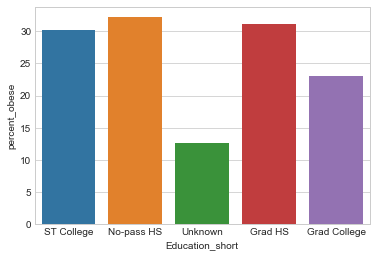

In [44]:
#Create  plots of education vs obesity percent
sns.set_style("whitegrid")
ax = sns.barplot(x=edui2016_grp_cnt["Education_short"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)

In [ ]:
ax = sns.barplot(x=edui2016_grp_cnt["Education_level"], y=edui2016_grp_cnt["percent_obese"], data=edui2016_grp_cnt)